<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.
Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.datasets import fetch_california_housing

In [2]:
#Получите данные и загрузите их в рабочую среду
housing = fetch_california_housing()

In [22]:
#Исходные признаки
X=pd.DataFrame(housing.data)
X.rename(columns={0:'MedInc_средний_доход',1:'HouseAge_средний_возраст_дома ',2:'AveRooms_среднее_количество_комнат',3:'AveBedrms_среднее_количество_спален' ,4:'Population_население',5:'AveOccup_среднее_количество_жильцов',6:'Latitude_широта',7:'Longitude_долгота'}, inplace=True)
XXL=X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20640 non-null  float64
 1   HouseAge_средний_возраст_дома        20640 non-null  float64
 2   AveRooms_среднее_количество_комнат   20640 non-null  float64
 3   AveBedrms_среднее_количество_спален  20640 non-null  float64
 4   Population_население                 20640 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20640 non-null  float64
 6   Latitude_широта                      20640 non-null  float64
 7   Longitude_долгота                    20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
X.head()

,MedInc_средний_доход,HouseAge_средний_возраст_дома,AveRooms_среднее_количество_комнат,AveBedrms_среднее_количество_спален,Population_население,AveOccup_среднее_количество_жильцов,Latitude_широта,Longitude_долгота
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [106]:
#целевая переменная - медианная стоимость дома, в сотнях тыс. дол.
y=pd.DataFrame(housing.target)
y.rename(columns={0:'Price,K$'},inplace=True)
y.head()

,"Price,K$"
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [107]:
#модель 1 на основе всех неизмененных признаков
model1 = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model1.fit(X_train, y_train)

LinearRegression()

In [108]:
#Оценка модели 1(метрики RMSE, R2)
y_pred1 = model1.predict(X_train)
print('На обучающем датасете:')
print(f'R2: {metrics.r2_score(y_train, y_pred1)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred1))}')

y_pred2 = model1.predict(X_test)
print('На тестовом датасете:')
print(f'R2: {metrics.r2_score(y_test, y_pred2)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred2))}')

На обучающем датасете:
R2: 0.6088968118672871
RMSE: 0.7234924745376035
На тестовом датасете:
R2: 0.5943232652466202
RMSE: 0.7273129773603114


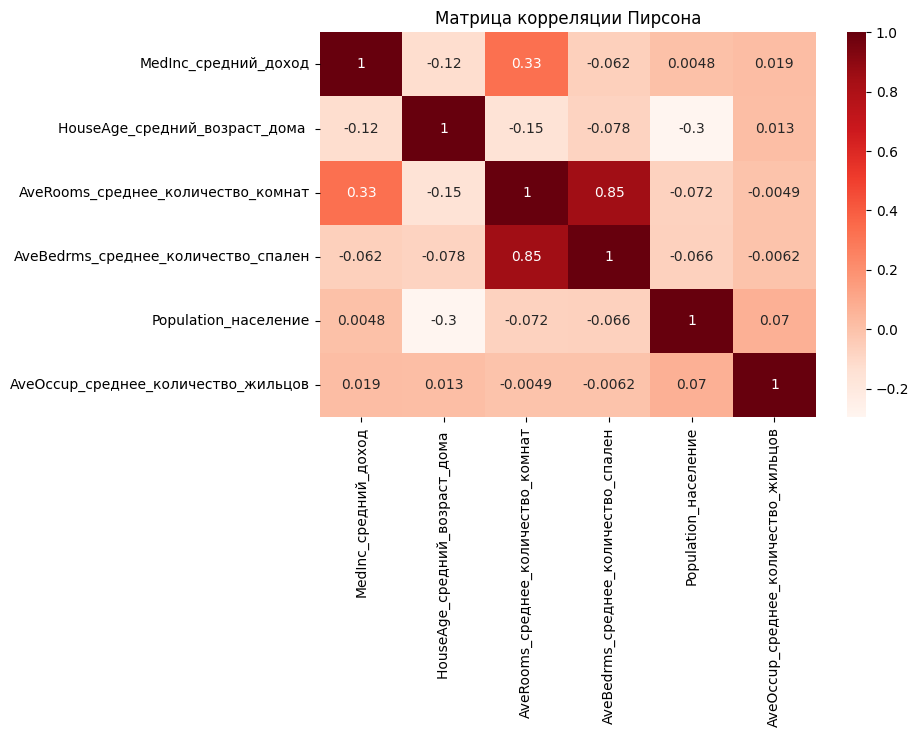

In [109]:
#Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
#Выводы:два столбца AveRooms и AveBedrms с хорошей корреляцией, еще можно увидеть слабую положительную корреляцию между столбцами MedInc и  AveRooms, и слабую отрицательную корреляцию между Population и HouseAge. Удалим оставшийся AveOccup  из признаков.

corr_matrix_pearson = X[['MedInc_средний_доход','HouseAge_средний_возраст_дома ','AveRooms_среднее_количество_комнат','AveBedrms_среднее_количество_спален' ,'Population_население','AveOccup_среднее_количество_жильцов']].corr()
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции Пирсона")
plt.show()

In [113]:
#модель 2 на основе признаков, отобранных по значениям корреляций
X = X.drop(columns=['AveOccup_среднее_количество_жильцов'])

model2 =  LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2.fit(X_train, y_train)


LinearRegression()

In [114]:
#Оценка модели 2 (метрики RMSE, R2)

y_pred3 = model2.predict(X_train)
print('На обучающем датасете:')
print(f'R2: {metrics.r2_score(y_train, y_pred3)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_pred3))}')

y_pred4 = model2.predict(X_test)
print('На тестовом датасете:')
print(f'R2: {metrics.r2_score(y_test, y_pred4)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred4))}')


На обучающем датасете:
R2: 0.6082046143576468
RMSE: 0.7241324313494703
На тестовом датасете:
R2: 0.5917576300266953
RMSE: 0.7296092376466279


In [30]:
#работа с геоданными
#получаем название по широте и долготе
from geopy.geocoders import Nominatim

lat1=XXL['Latitude_широта'][0]  #37.88
long1=XXL['Longitude_долгота'][0]  #-122.23

lat2=XXL['Latitude_широта'][100]
long2=XXL['Longitude_долгота'][100]

geolocator = Nominatim(user_agent="user")
location1 = geolocator.reverse("{}, {}".format(lat1, long1))
location2 = geolocator.reverse("{}, {}".format(lat2, long2))

print(location1[0])
print(location2[0])

Ecological Study Area, Vollmer Peak Trail, Contra Costa County, California, 94563, United States
431, Lagunitas Avenue, Adams Point, Eastlake, Oakland, Alameda County, California, 94610, United States


In [32]:
#определяем расстояние между точками
from geopy import distance

point1 = ("{}, {}".format(lat1, long1))
point2 = ("{}, {}".format(lat2, long2))

print(distance.distance(point1, point2).km)

7.966471951551678
